# [CVD and obesity dataset](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) from Kaggle

**Quoted from Kaggle page**

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.

The attributes related with eating habits are:
* Frequent consumption of high caloric food (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Consumption of water daily (CH20)
* Consumption of alcohol (CALC)

The attributes related with the physical condition are:
* Calories consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Transportation used (MTRANS)

NObesity values are:
* Underweight: Less than 18.5
* Normal: 18.5 to 24.9
* Overweight: 25.0 to 29.9
* Obesity I: 30.0 to 34.9
* Obesity II: 35.0 to 39.9
* Obesity III: Higher than 40

In [1]:
## Install required library if needed
# !pip install numpy scipy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, mannwhitneyu, wilcoxon, ttest_ind, ttest_rel

## Load data (zip file)

In [3]:
data = pd.read_csv('datasets/Kaggle_CVD_obesity.zip', compression = 'zip')
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [4]:
print(data.shape)

(2111, 17)


### Sort the categories of obesity

In [5]:
pd.unique(data['NObeyesdad'])

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [6]:
data['NObeyesdad'] = data['NObeyesdad'].astype('category')
data['NObeyesdad'] = data['NObeyesdad'].cat.reorder_categories(['Insufficient_Weight', 'Normal_Weight',
                                                                'Overweight_Level_I', 'Overweight_Level_II',
                                                                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])

## Quality check

### This data set has no missing data

In [7]:
pd.isna(data).sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Check the distribution of numerical values
Can you spot something unusual?

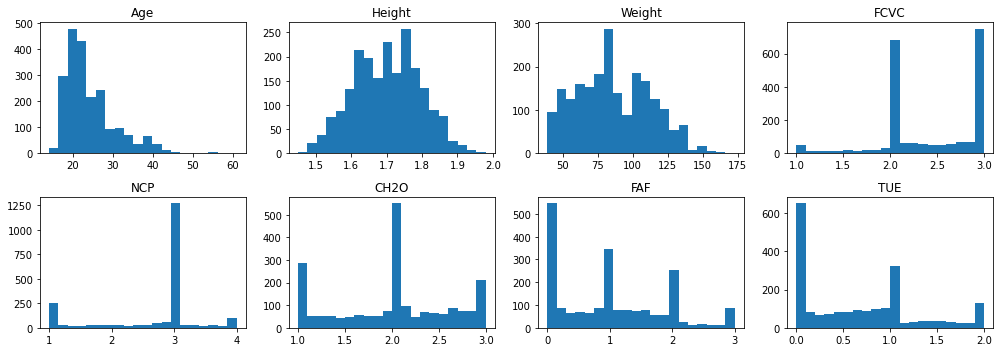

In [8]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize = (14, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    plt.hist(data[numerical_features[i]], bins = 20)
    plt.title(feature)
    
plt.tight_layout()
plt.show()

### Several features were inconsistently collected as integer or real values!!

In [9]:
display(data.head())
display(data.tail())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


### Check the consistency of data collection
Whether FAVC and NCP were collected as integers together

In [10]:
FAVC_int_count = sum(data['FCVC'] == data['FCVC'].astype(int))
NCP_int_count = sum(data['NCP'] == data['NCP'].astype(int))
FAVC_NCP_int_count = sum((data['FCVC'] == data['FCVC'].astype(int)) & (data['NCP'] == data['NCP'].astype(int)))

print(FAVC_int_count, NCP_int_count, FAVC_NCP_int_count)

1285 1471 1076


### We will lose half of the data if restricted to either integer or real values :(

### Check the distribution of binary and categorical values

In [11]:
categorical_features = [x for x in data.columns if not x in numerical_features]

for feature in categorical_features:
    display(data[feature].value_counts())

Gender
Male      1068
Female    1043
Name: count, dtype: int64

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC
yes    1866
no      245
Name: count, dtype: int64

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

SMOKE
no     2067
yes      44
Name: count, dtype: int64

SCC
no     2015
yes      96
Name: count, dtype: int64

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

### Almost no smoker and calorie consumption monitoring
There are also some other minor classes: like transportation by walking, motorbike, and bike, and always drinking

### We could drop and merge these classes -- but let's check association with outcome first
#### SMOKE does not seem to be associated

In [12]:
smoke_outcome = pd.crosstab(data['SMOKE'], data['NObeyesdad'])
smoke_outcome.head()

NObeyesdad,Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III
SMOKE,,,,,,,
no,271,274,287,285,345,282,323
yes,1,13,3,5,6,15,1


In [13]:
chi2_contingency(smoke_outcome.loc['no'], smoke_outcome.loc['yes'])

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([271., 274., 287., 285., 345., 282., 323.]))

#### SCC is more frequent in the less obese groups

In [14]:
scc_outcome = pd.crosstab(data['SCC'], data['NObeyesdad'])
scc_outcome.head()

NObeyesdad,Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III
SCC,,,,,,,
no,250,257,253,286,349,296,324
yes,22,30,37,4,2,1,0


In [15]:
chi2_contingency(scc_outcome.loc['no'], scc_outcome.loc['yes'])

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([250., 257., 253., 286., 349., 296., 324.]))

#### Transportation

In [16]:
trans_outcome = pd.crosstab(data['MTRANS'], data['NObeyesdad'])
trans_outcome.head()

NObeyesdad,Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III
MTRANS,,,,,,,
Automobile,46,45,66,94,110,95,1
Bike,0,4,2,0,0,1,0
Motorbike,0,6,1,1,3,0,0
Public_Transportation,220,200,212,189,236,200,323
Walking,6,32,9,6,2,1,0


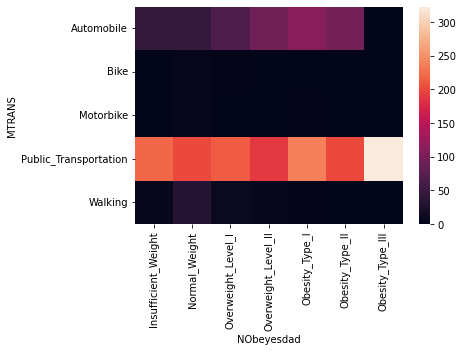

In [17]:
_ = sns.heatmap(trans_outcome)

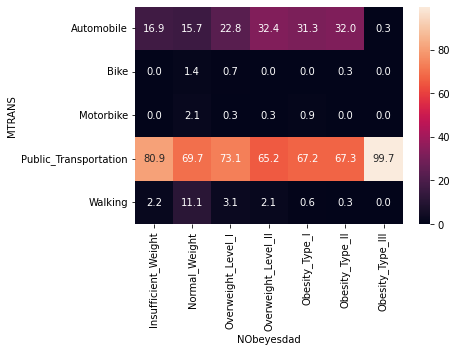

In [18]:
trans_outcome = pd.crosstab(data['MTRANS'], data['NObeyesdad'], normalize = 'columns')
_ = sns.heatmap(trans_outcome * 100, annot = True, fmt = '.1f')

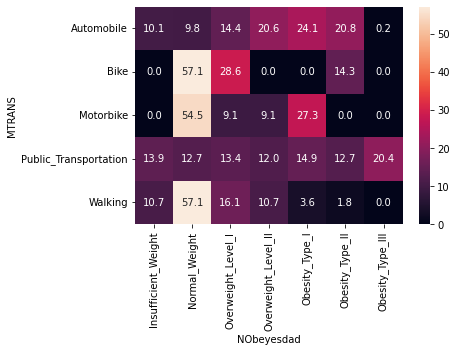

In [19]:
trans_outcome = pd.crosstab(data['MTRANS'], data['NObeyesdad'], normalize = 'index')
_ = sns.heatmap(trans_outcome * 100, annot = True, fmt = '.1f')

### There is some association between more manual mode of transportation with normal weight

### Merge rare categories
* Merge always and frequently alcohol consumption (CALC)
* Merge manual modes of transportation

In [26]:
merged_data = data.copy()
merged_data.loc[merged_data['CALC'] == 'Always', 'CALC'] = 'Frequently'

merged_data.loc[merged_data['MTRANS'].isin(['Bike', 'Motorbike', 'Walking']), 'MTRANS'] = 'Bike-Walking'

## Sanity test
### Double check the label (should be based on BMI)

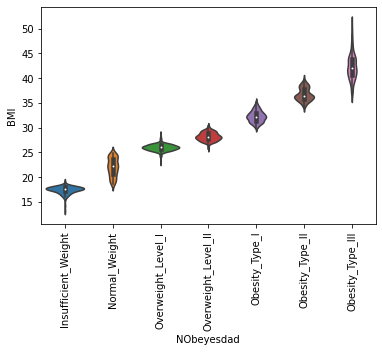

In [27]:
merged_data['BMI'] = merged_data['Weight'] / np.power(merged_data['Height'], 2)
_ = sns.violinplot(merged_data, x = 'NObeyesdad', y = 'BMI')
plt.xticks(rotation = 90);

### Distribution of numerical features across obesity groups

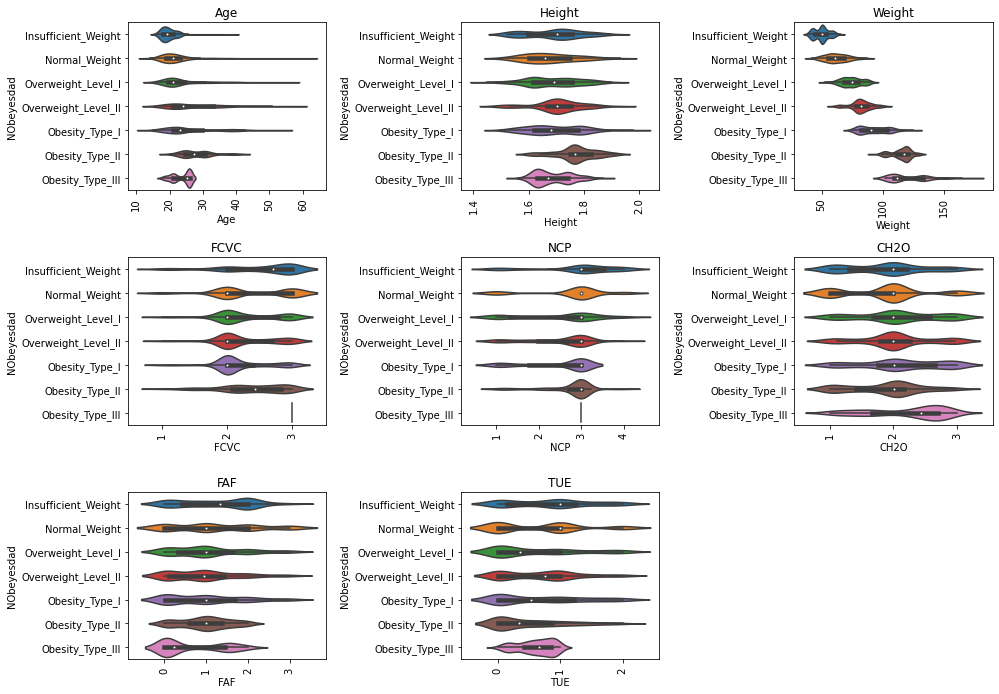

In [28]:
plt.figure(figsize = (14, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(merged_data, orient = 'h', y = 'NObeyesdad', x = numerical_features[i])
    plt.xticks(rotation = 90)
    plt.title(feature)
    
plt.tight_layout()
plt.show()

### Obesity type III are younger (potential for other confounders and biases)

### What patterns do you spot? Which is expected, which is unexpected?
Be aware of the direction of cause and effect

### Association of categorical features with obesity

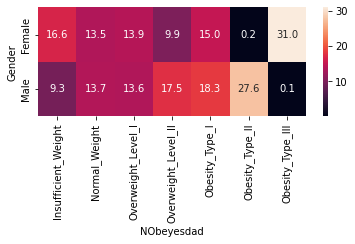

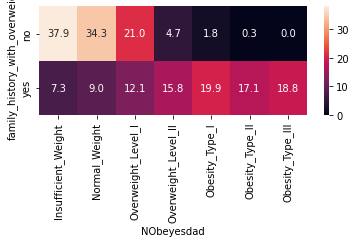

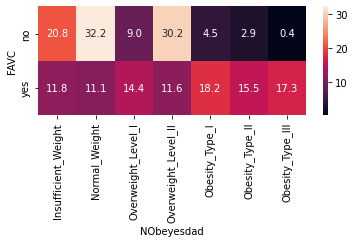

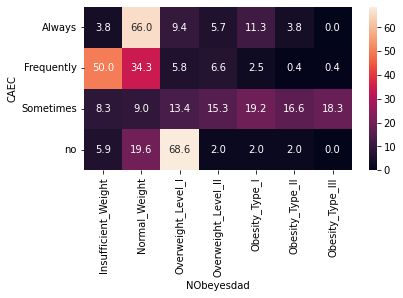

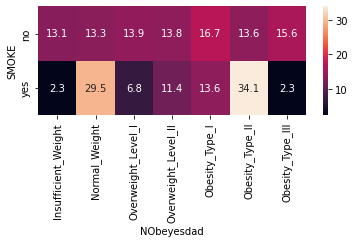

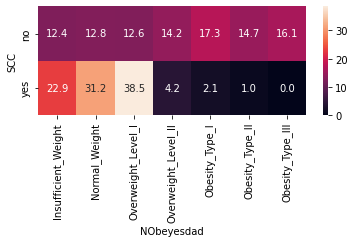

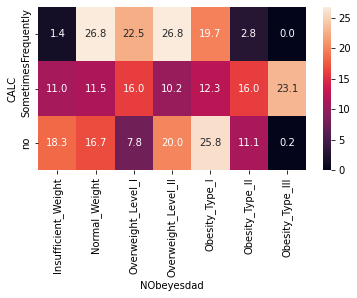

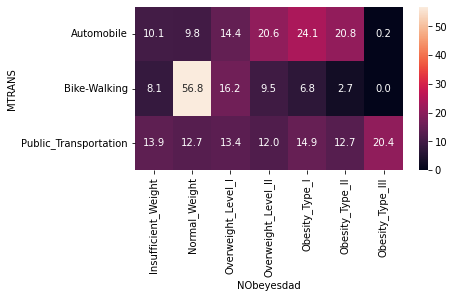

In [29]:
for feature in categorical_features[:-1]: ## ignore the actual outcome
    if len(pd.unique(merged_data[feature])) == 2:
        plt.figure(figsize = (6, 2))
    else:
        plt.figure(figsize = (6, 3))
        
    _ = sns.heatmap(pd.crosstab(merged_data[feature], merged_data['NObeyesdad'], normalize = 'index') * 100, annot = True, fmt = '.1f')
    
    plt.show()

### What patterns do you spot? Which is expected, which is unexpected?